In [ ]:
import  tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# loading data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

1


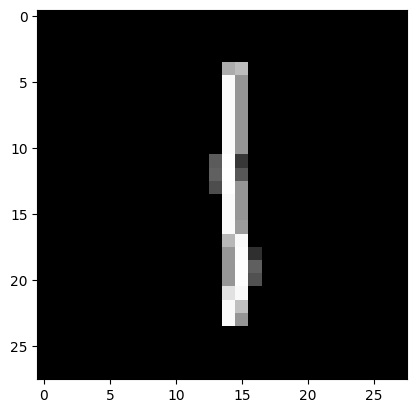

In [ ]:
index = 1002
label = y_train[index]
image = x_train[index]
plt.imshow(image, cmap="gray")
print (label)

In [ ]:
# Normalize
x_train = x_train.reshape(-1 , 28,28, 1).astype("float32")/255.0
x_test  = x_test.reshape(-1 , 28,28, 1).astype("float32")/255.0


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#Model

cnn_model = keras.Sequential()

cnn_model.add(keras.layers.Conv2D(filters=128 , kernel_size = (3,3) , activation="relu" , strides=(1,1), padding="valid", input_shape= (28,28,1)))
cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn_model.add(keras.layers.Conv2D(filters=64 , kernel_size = (3,3) , activation="relu" , strides=(1,1), padding="valid"))
cnn_model.add(keras.layers.AveragePooling2D(pool_size=(2,2)))

cnn_model.add(keras.layers.Conv2D(filters=32 , kernel_size = (3,3) , activation="relu" , strides=(1,1), padding="valid"))
cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(units= 256 , activation="relu"))
cnn_model.add(keras.layers.Dense(units= 128 , activation="relu"))
cnn_model.add(keras.layers.Dense(units= 10  , activation="softmax"))


cnn_model.compile(optimizer=tf.optimizers.Adam (learning_rate=0.001) , loss=["sparse_categorical_crossentropy"] , metrics=["accuracy"] )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           8,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,170 (531.91 KB)

 Trainable params: 136,170 (531.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist =cnn_model.fit(x_train, y_train , epochs=10 , validation_data=(x_test, y_test), batch_size=256)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.6719 - loss: 0.9898 - val_accuracy: 0.9486 - val_loss: 0.1670
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9505 - loss: 0.1615 - val_accuracy: 0.9679 - val_loss: 0.1107
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9664 - loss: 0.1066 - val_accuracy: 0.9733 - val_loss: 0.0890
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9763 - loss: 0.0792 - val_accuracy: 0.9792 - val_loss: 0.0695
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9795 - loss: 0.0686 - val_accuracy: 0.9809 - val_loss: 0.0660
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9828 - loss: 0.0573 - val_accuracy: 0.9822 - val_loss: 0.0600
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9840 - loss: 0.0520 - val_accuracy: 0.9795 - val_loss: 0.0675
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9856 - loss: 0.0449 - val_acc

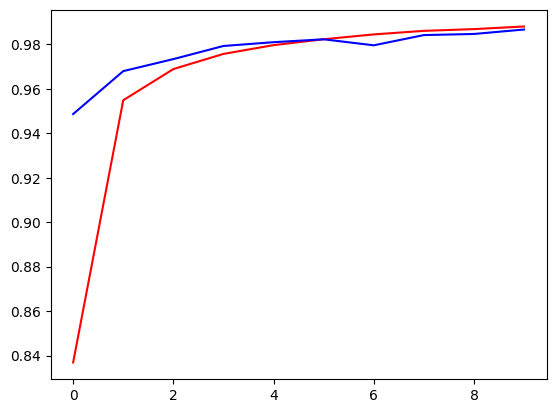

In [ ]:
plt.plot(hist.history["accuracy"] , color="red")
plt.plot(hist.history["val_accuracy"] , color="blue")

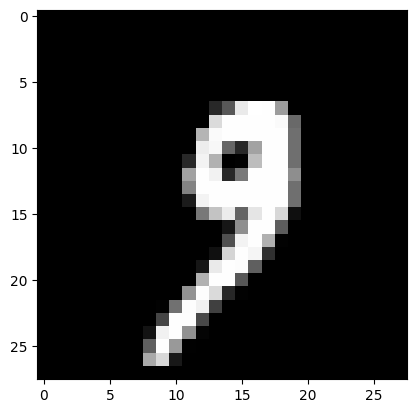

In [ ]:
img = x_test[1000]
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
#prediction
import numpy as np
prediction = cnn_model.predict(img.reshape(1, 28, 28))
print("Predicted Class:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Predicted Class: 9


In [ ]:
cnn_model.save('mnistcnn.h5')

In [ ]:
from google.colab import files
files.download('mnistcnn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>